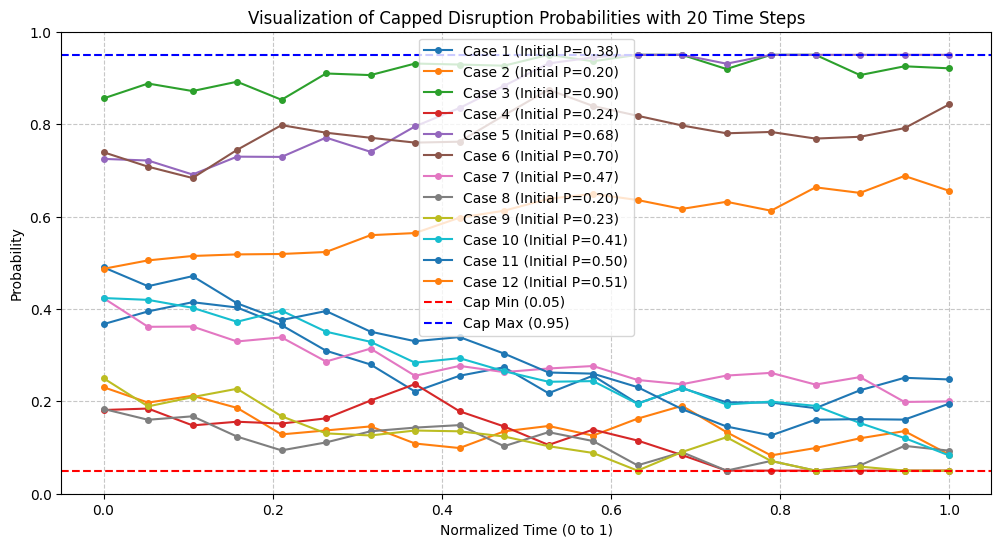

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for simulation
time_steps_medium = 20  # Set to 20 time steps
time_medium = np.linspace(0, 1, time_steps_medium)  # Normalized time
random_seed = 42  # Ensure reproducibility
num_cases = 12  # Number of cases to simulate
cap_min, cap_max = 0.05, 0.95  # Define caps for probabilities

# Initialize random probabilities for initial cases
np.random.seed(None)
initial_probs = np.random.uniform(0.1, 0.9, num_cases)

# Simulate probabilities over time
capped_probs_medium = []
for initial_prob in initial_probs:
    probs = []
    current_prob = initial_prob
    for t in time_medium:
        if current_prob == 0.00 or current_prob == 1.00:
            probs.append(current_prob)  # Lock the value if resolved
            continue

        random_variation = np.random.uniform(-0.05, 0.05)  # Random adjustment
        bias = 0.05 * (1 - current_prob) if current_prob > 0.5 else -0.05 * current_prob  # Bias toward extremes
        progression = random_variation + bias
        current_prob = current_prob + progression

        # Cap probabilities at [cap_min, cap_max]
        current_prob = max(cap_min, min(cap_max, current_prob))
        probs.append(current_prob)
    capped_probs_medium.append(probs)

# Plot the updated results with 20 time steps
plt.figure(figsize=(12, 6))
for i, probs in enumerate(capped_probs_medium):
    plt.plot(time_medium, probs, marker="o", markersize=4, label=f"Case {i+1} (Initial P={initial_probs[i]:.2f})")  # Reduced marker size

plt.axhline(y=cap_min, color="red", linestyle="--", label="Cap Min (0.05)")
plt.axhline(y=cap_max, color="blue", linestyle="--", label="Cap Max (0.95)")
plt.title("Visualization of Capped Disruption Probabilities with 20 Time Steps")
plt.xlabel("Normalized Time (0 to 1)")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside the plot on the right side
plt.show()
